In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000, 28, 28)


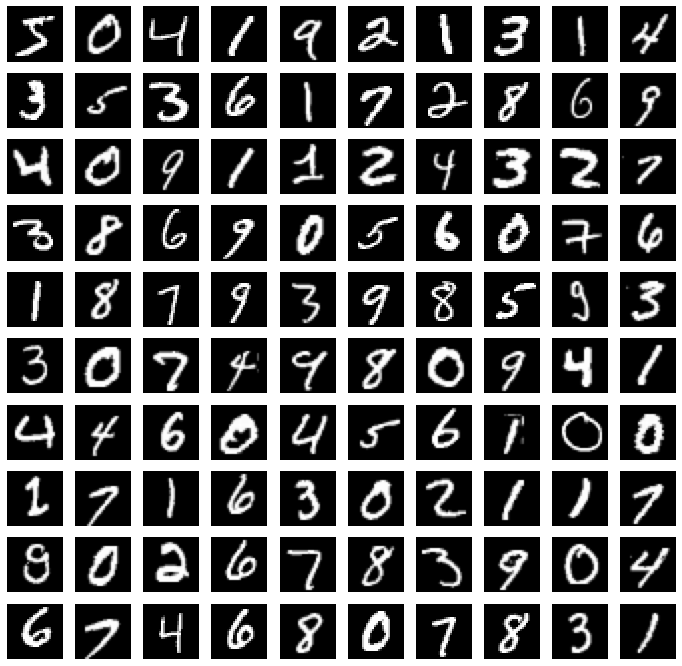

In [ ]:
plt.figure(figsize = (12,12))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap="gray")

In [ ]:
x_train = x_train/255

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
codings_size = 30

generator = tf.keras.models.Sequential([
              keras.layers.Dense(128, activation='selu', input_shape = [codings_size]),
              keras.layers.Dense(256, activation='selu'),
              keras.layers.Dense(28*28, activation='selu'),
              keras.layers.Reshape([28,28])
                        
])

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 238,480
Trainable params: 238,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator = tf.keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28,28]),
              keras.layers.Dense(256, activation='selu'),
              keras.layers.Dense(128, activation='selu'),
              keras.layers.Dense(1, activation='sigmoid')
                        
])

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gan = keras.models.Sequential([generator, discriminator])
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28)            238480    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 233985    
Total params: 472,465
Trainable params: 472,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer ='rmsprop')
discriminator.trainable=False
gan.compile(loss='binary_crossentropy', optimizer ='rmsprop')


In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for x_batch in dataset:
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      x_batch = tf.cast(x_batch, tf.float32)

      x_fake_and_real = tf.concat([generated_images, x_batch], axis=0)
      y1= tf.constant([[0.]]*batch_size + [[1.]]*batch_size)

      discriminator.trainable=True
      discriminator.train_on_batch(x_fake_and_real,y1)

      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]]*batch_size)

      discriminator.trainable = False
      gan.train_on_batch(noise, y2)


In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
noise = tf.random.normal(shape=[100, codings_size])
generated_images = generator(noise)
generated_images.shape

TensorShape([100, 28, 28])

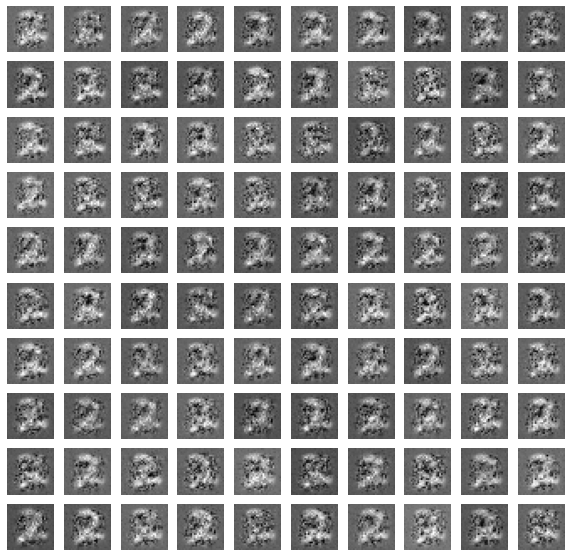

In [ ]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(generated_images[i], cmap="gray")